Loading a model without an environment, this model cannot be trained until it has a valid environment.


<Figure size 1440x1440 with 0 Axes>

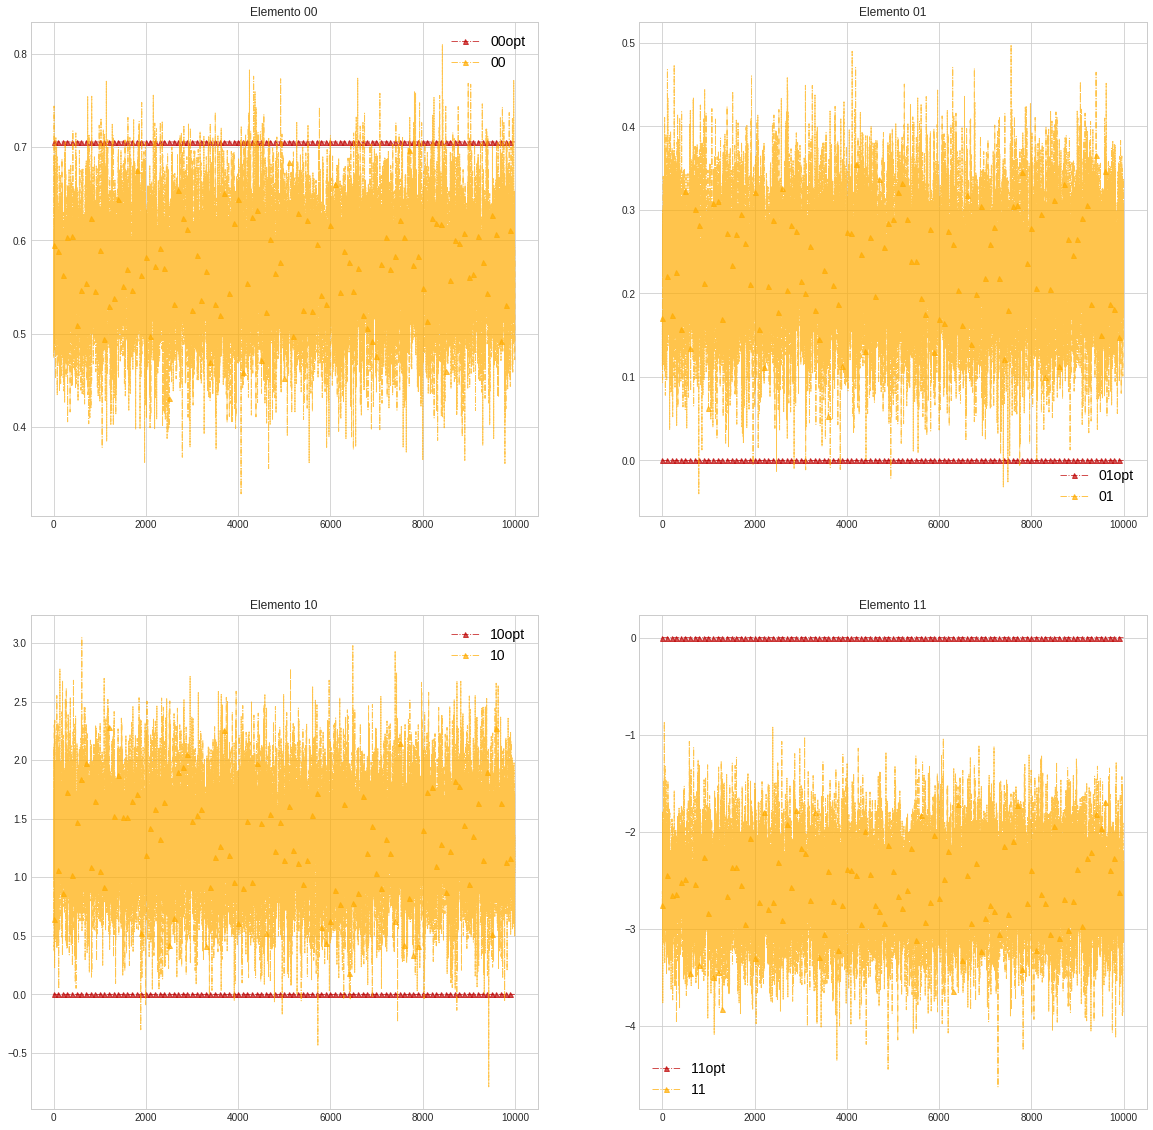

<Figure size 1440x1440 with 0 Axes>

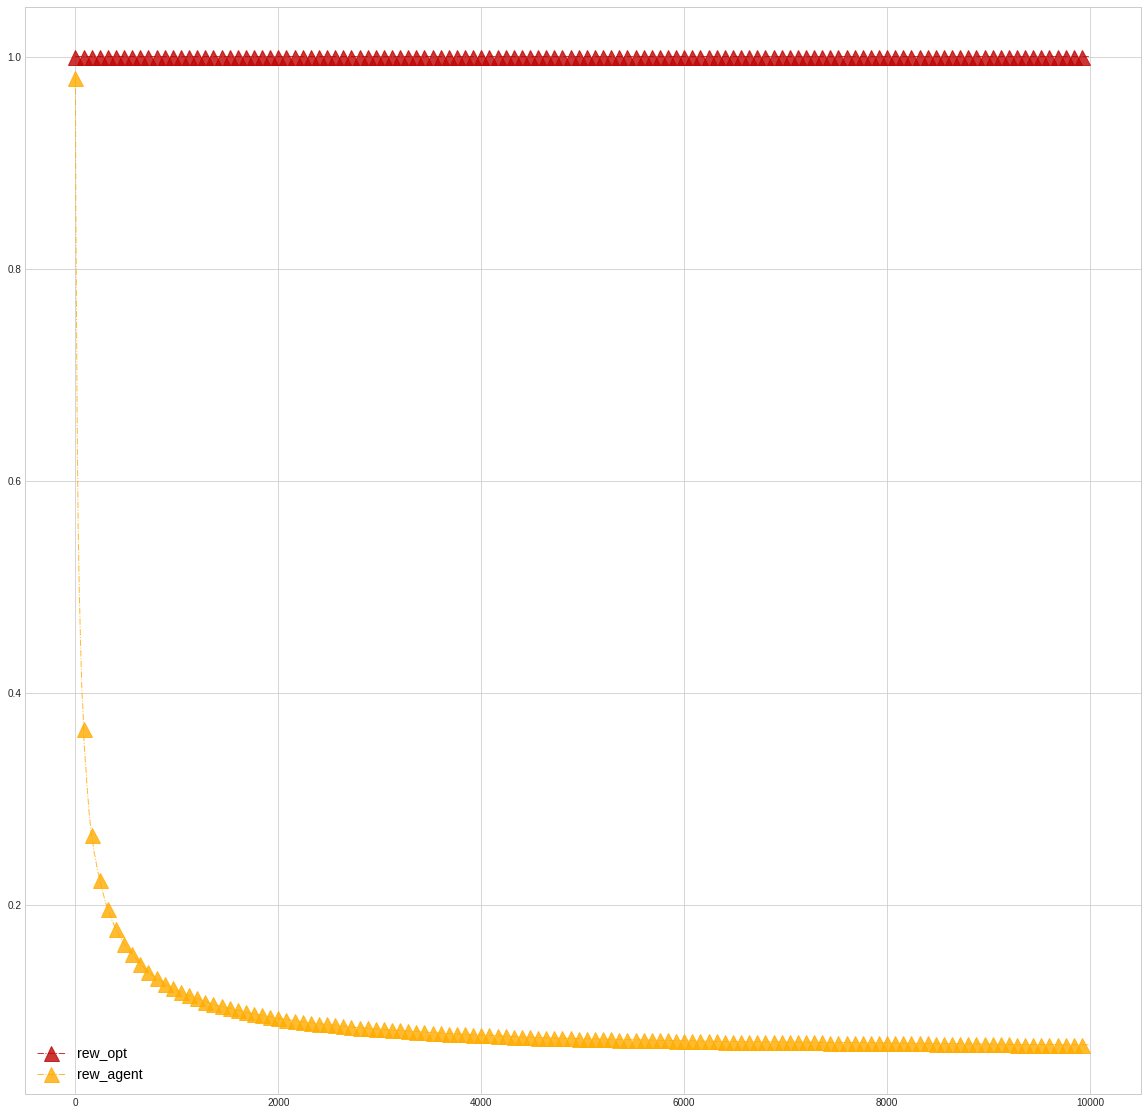

<Figure size 1440x1440 with 0 Axes>

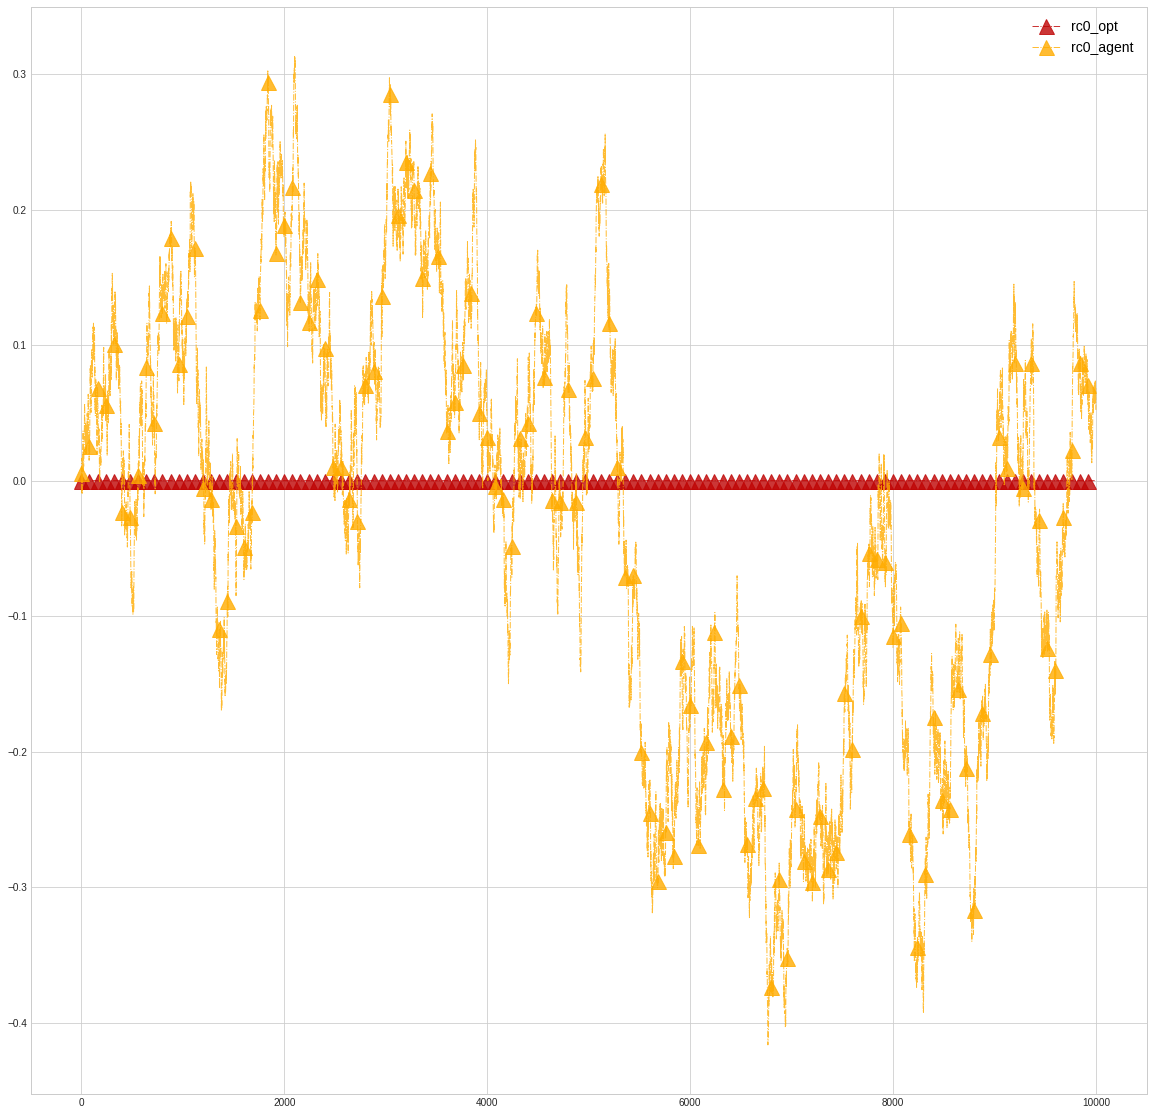

<Figure size 1440x1440 with 0 Axes>

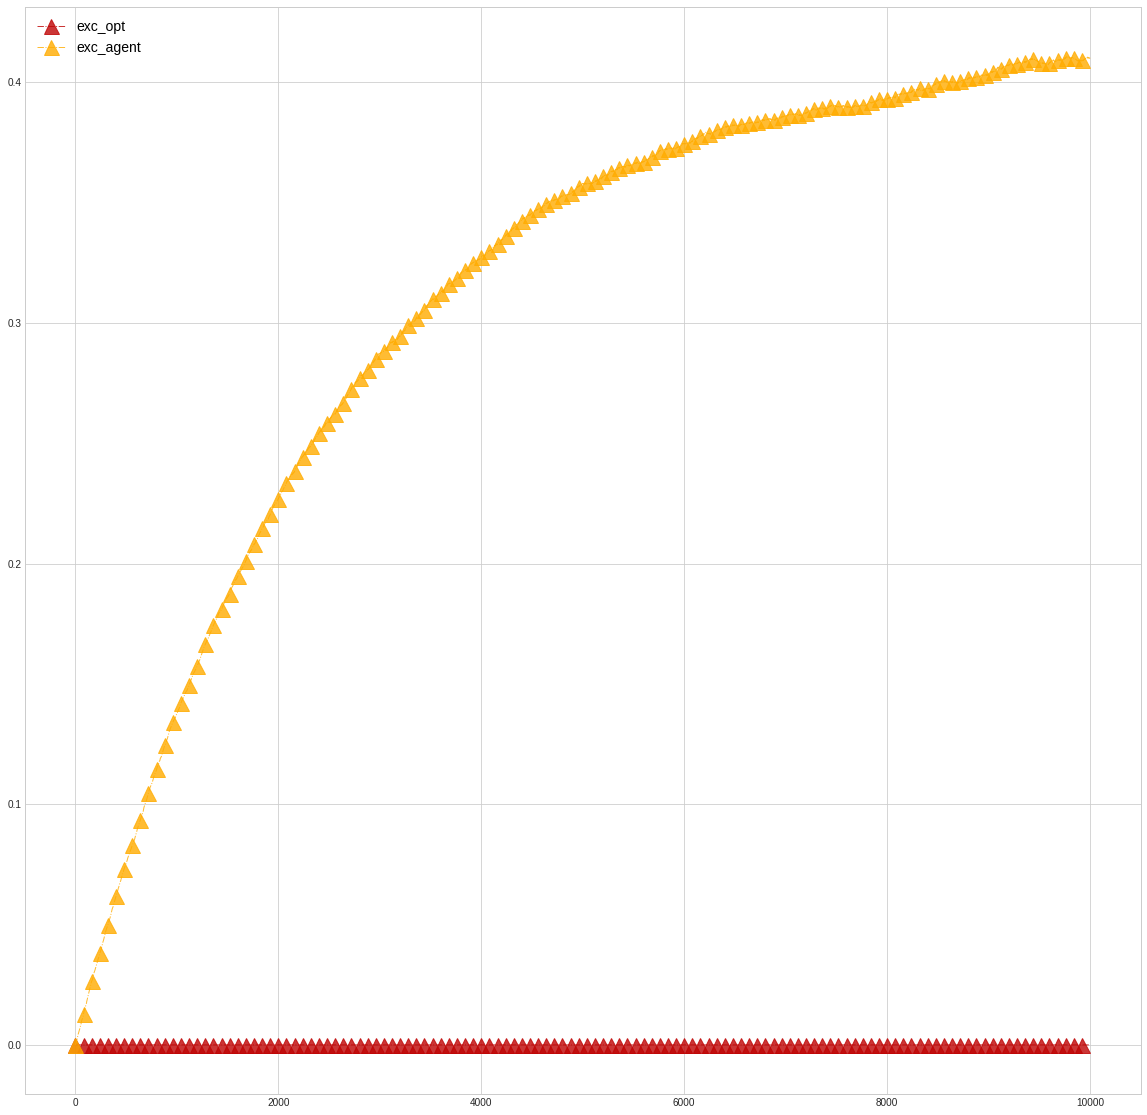

<Figure size 1440x1440 with 0 Axes>

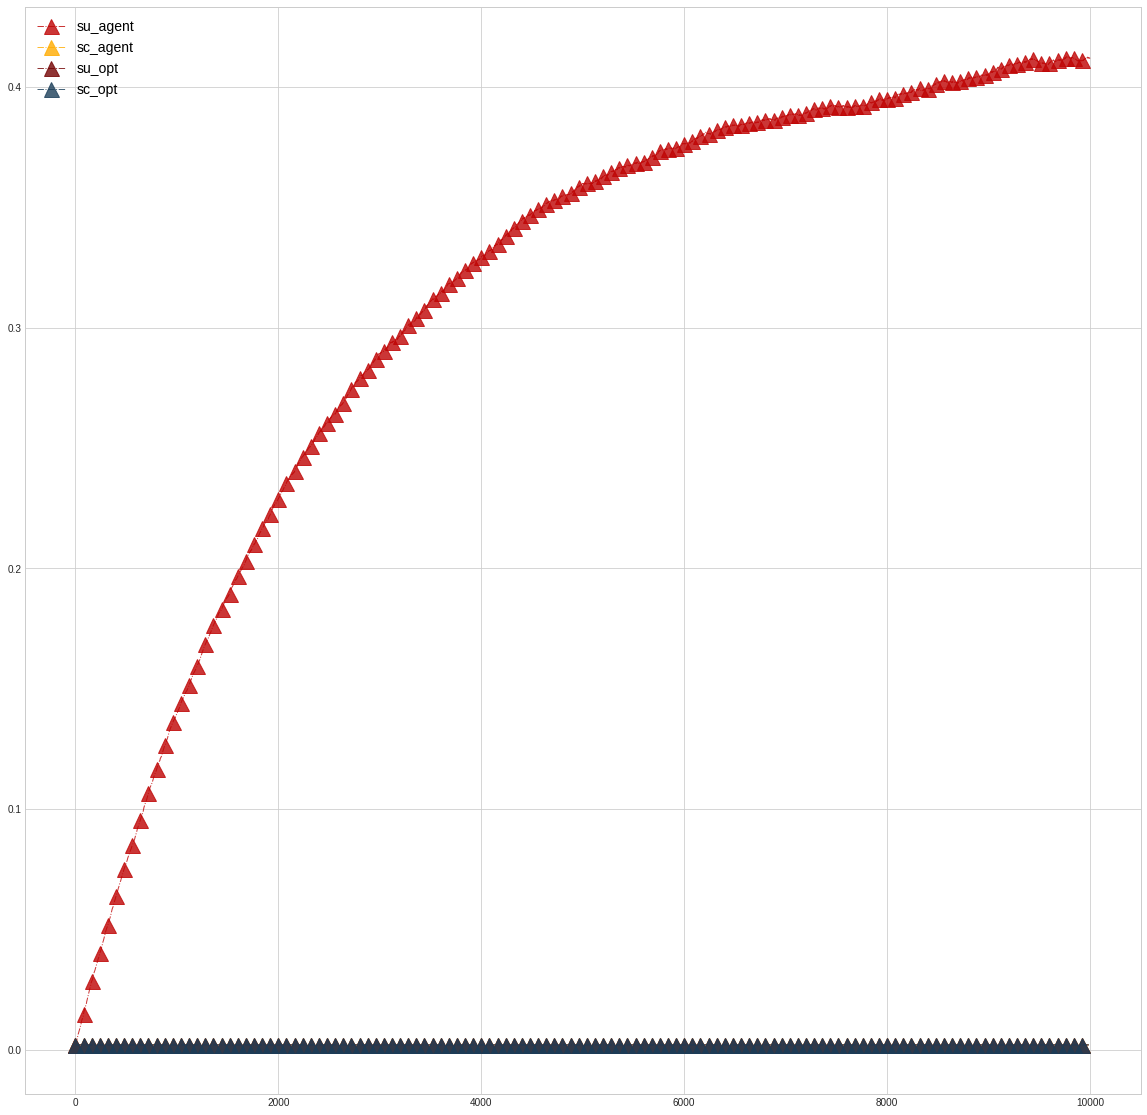

<Figure size 1440x1440 with 0 Axes>

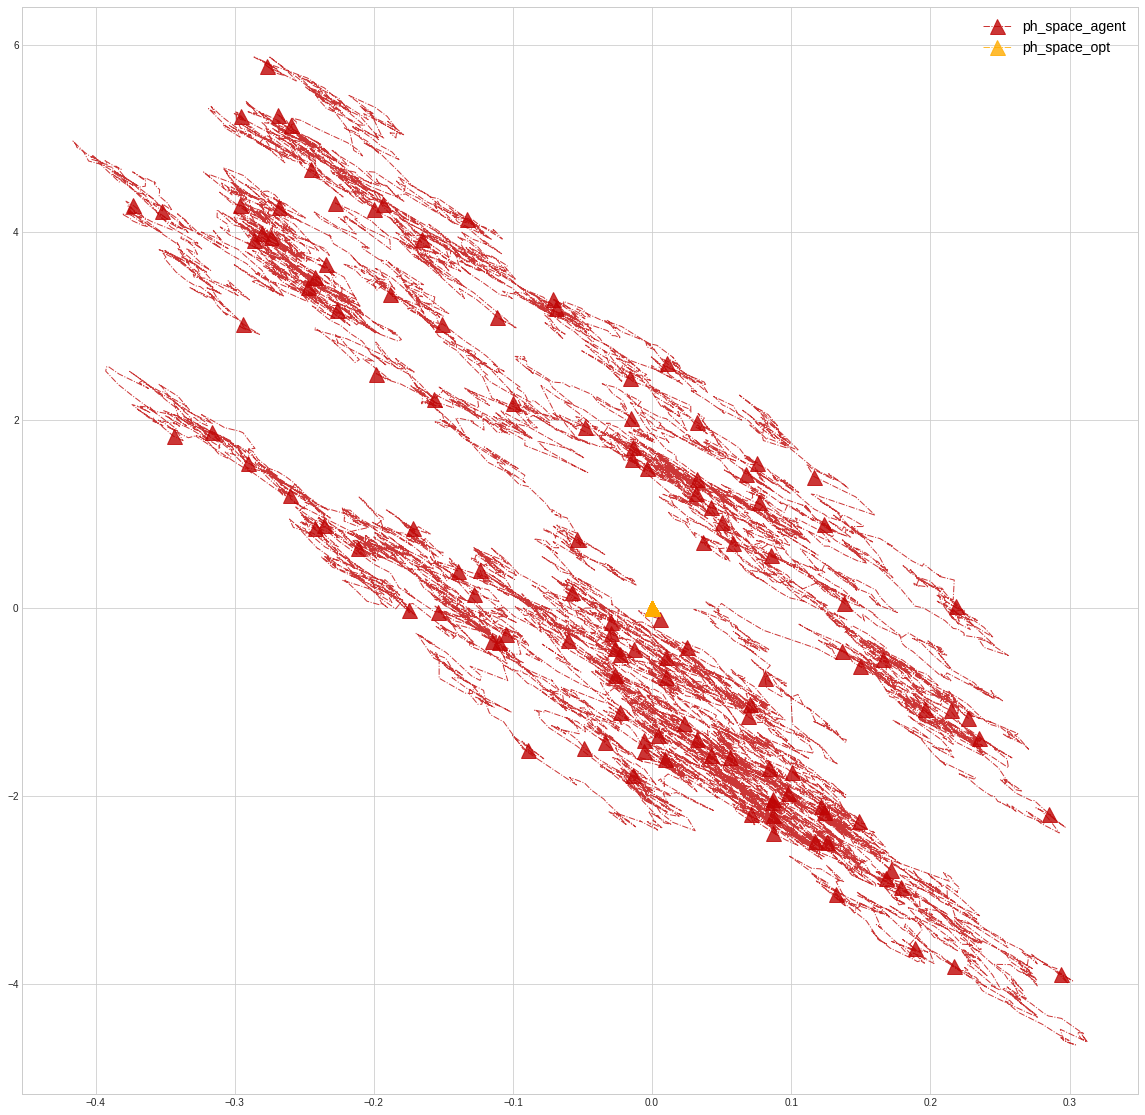

<Figure size 1440x1440 with 0 Axes>

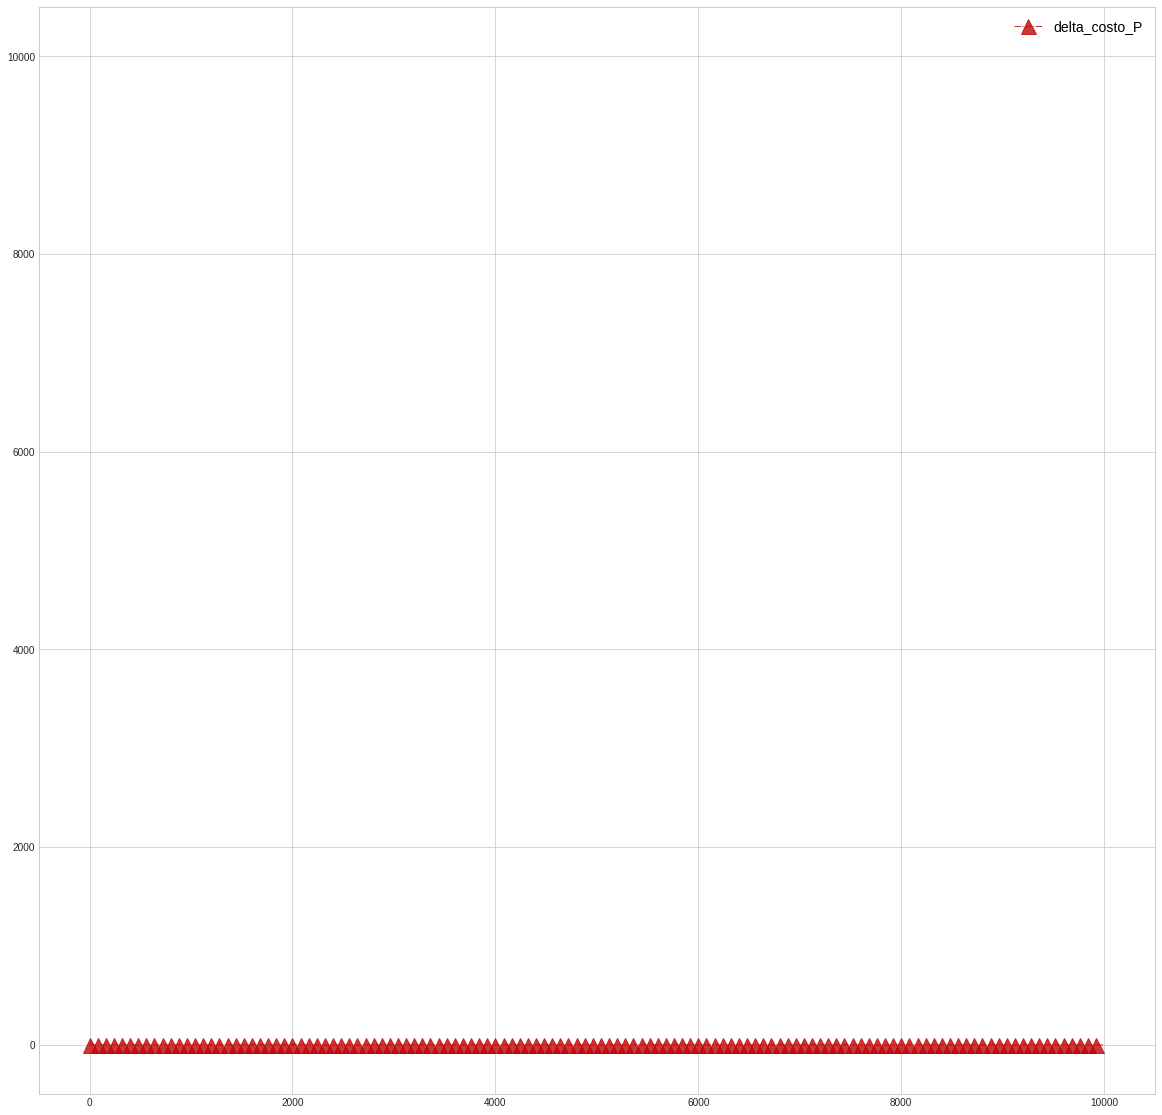

In [4]:
import gym
import matplotlib as mpl
import numpy as np
import math
import matplotlib.gridspec as gridspec
from cycler import cycler
from Optimal_Action_Markov import Optimal_Agent as OAM
from Optimal_Action import Optimal_Agent as OAB
from matplotlib import pyplot as plt
from stable_baselines.common.policies import MlpPolicy, MlpLstmPolicy, MlpLnLstmPolicy
from stable_baselines import PPO2
import matplotlib.pyplot as plt
from gym_feedback.envs import OptomechEnv
from gym_feedback.envs import CavityEnv
import Plot_Tools as pltools
import sys

plt.style.use(['seaborn-whitegrid'])#(['Solarize_Light2'])
plt.rcParams['figure.figsize'] = [20,20]
mpl.rcParams['lines.linewidth'] = 4
mpl.rcParams["scatter.marker"] = ','
mpl.rcParams['lines.linestyle'] = '-.'
Grad = ['#BF0404','#FFAC00','#730202','#1B3E59']
            
mpl.rcParams['axes.prop_cycle'] =cycler(color=Grad)#['#ff6400','#00dfcb','#00d3d3','#008ab6','#004495'])#cycler(color=['#00fff7','#ff0074','#fff000','#ffb200','#ffffff'])#

#here you can define your reward function, inside environments the form of reward is rew()-(u.T)@Q@u, and the default setting is a purity-like reward
def cost(r):
    return r[0]**2+r[1]**2
P=np.array([[1.,0,0,0],[0,1.,0,0],[0,0,0,0],[0,0,0,0]])
def rew(r,sc,exc,pow): #if you don't want to use some parameters just ignore them
    return -cost(r) 


#carico l'agente allenato
model=PPO2.load("/home/fallani/prova/Revised/feedMarkov_steadyFalse_lro0.00025_ts100.0M_N1_ec0.01acsc1_q0/rl_model_27400000_steps.zip")

environment='Cavity'#'Optomech' and 'Cavity' are the choices

feedback='Markov'#'Markov' and 'Bayes are the choices'

plot=False #choose plot mode (here most of the times should be True)

steadyreset=True #if True sets steady state as reset (plot or non plot)

q=0 #if 'Bayes' has to be different from 0, otherwise Optimal Agent won't work

pow=0.5#is the power for the purity-like reward 1/(()**pow)

reward=None#rew #here you can set your own reward

det=False #deterministic option for actions

N=1 #number of realizations

steps=int(10e3) #walk lenght

if feedback=='Markov':
    OptAgent=OAM
    
if feedback=='Bayes':
    OptAgent=OAB

#choice of physical parameters and other stuff, note: if one of the parameters in params is set to None it will be sampled from a uniform sitribution at every reset
if environment=='Cavity':
    
    params={'k':1,'eta':1,'X_kunit':0.499}
    F=np.identity(2)
    
    if reward==None:
        env=CavityEnv(feedback=feedback,F=F,q=q,plot=plot,steadyreset=steadyreset,pow=pow,params=params)
        optenv=CavityEnv(feedback=feedback,F=F,q=q,plot=plot,steadyreset=steadyreset,pow=pow,params=params)
    
    if reward!=None:
        env=CavityEnv(feedback=feedback,rewfunc=rew,F=F,q=q,plot=plot,steadyreset=steadyreset,pow=pow,params=params)
        optenv=CavityEnv(feedback=feedback,rewfunc=rew,F=F,q=q,plot=plot,steadyreset=steadyreset,pow=pow,params=params)
    
    
    opt_model=OptAgent(optenv)
    
    

        
        
        
if environment=='Optomech':
    
    params={'wm':1,'k':0.5,'y':2e-7,'eta':1,'g':2*0.15,'detuning':1,'ne':3.5e5,'na':0,'phi':math.pi/2}
    #set F matrix
    zero=np.zeros((2,2))
    F=np.block([[zero,zero],[zero,np.identity(2)]])
    
    
    if reward==None:
        env=OptomechEnv(feedback=feedback,P=P,F=F,q=q,plot=plot,steadyreset=steadyreset,pow=pow,params=params)
        optenv=OptomechEnv(feedback=feedback,P=P,F=F,q=q,plot=plot,steadyreset=steadyreset,pow=pow,params=params)
    
    if reward!=None:
        env=OptomechEnv(feedback=feedback,P=P,rewfunc=rew,F=F,q=q,plot=plot,steadyreset=steadyreset,pow=pow,params=params)
        print('boh')
        sys.exit()
        optenv=OptomechEnv(feedback=feedback,P=P,rewfunc=rew,F=F,q=q,plot=plot,steadyreset=steadyreset,pow=pow,params=params)
    
    opt_model=OptAgent(optenv)


#sys.exit()
DATA=pltools.media_cammini(N=N,steps=steps,env=env,det=det,optenv=optenv,model=model,opt_model=opt_model,Optimal_Agent=OptAgent)

x=np.array(list(range(0,steps)))

a=0.7
dim=len(DATA['rmean'][0,:])


plt.figure('M(t)')
fig, ax = plt.subplots(dim,dim)
for i in range(0,dim):
    for j in range(0,dim):
        ax[i, j].set_title('Elemento {}{}'.format(i,j))
        ax[i,j].plot(x,DATA['azionemean2'][:,i,j],'-.',linewidth=1,marker='^',markersize=5,markevery=100,label='{}{}opt'.format(i,j),alpha=a)
        ax[i,j].plot(x,DATA['azionemean'][:,i,j],'-.',linewidth=1,marker='^',markersize=5,markevery=100,label='{}{}'.format(i,j),alpha=a)
        #ax[0,0].fill_betweenx(x, DATA['azionemean'][:,i,j]-0.5*DATA['azionestd'][:,i,j] DATA['azionemean'][:,i,j]+0.5*DATA['azionestd'][:,i,j],alpha=0.3)
        leg = ax[i,j].legend(prop={'size': 14})
        text=leg.get_texts()
        for k in range(0,len(text)):
            text[k].set_color('black')


a=0.8
plt.figure('reward')
fig, ax = plt.subplots()
ax.plot(x,DATA['rewmean2'],'-.',linewidth=1,marker='^',markersize=15,markevery=80,label='rew_opt',alpha=a)
ax.fill_between(x, DATA['rewmean2']-0.5*DATA['rewstd2'], DATA['rewmean2']+0.5*DATA['rewstd2'],alpha=0.3)
ax.plot(x,DATA['rewmean'],'-.',linewidth=1,marker='^',markersize=15,markevery=80,label='rew_agent',alpha=a)
ax.fill_between(x,  DATA['rewmean']-0.5*DATA['rewstd'], DATA['rewmean']+0.5*DATA['rewstd'],alpha=0.3)
leg = ax.legend(prop={'size': 14})
text=leg.get_texts()
for i in range(0,len(text)):
    text[i].set_color('black')


plt.figure('r')
fig, ax = plt.subplots()
ax.plot(x,DATA['rmean2'][:,0],'-.',linewidth=1,marker='^',markersize=15,markevery=80,label='rc0_opt',alpha=a)
ax.fill_between(x, DATA['rmean2'][:,0]-0.5*DATA['rstd2'][:,0], DATA['rmean2'][:,0]+0.5*DATA['rstd2'][:,0] ,alpha=0.3)
ax.plot(x,DATA['rmean'][:,0],'-.',linewidth=1,marker='^',markersize=15,markevery=80,label='rc0_agent',alpha=a)
ax.fill_between(x, DATA['rmean'][:,0]-DATA['rstd'][:,0], DATA['rmean'][:,0]+DATA['rstd'][:,0] ,alpha=0.3)
leg = ax.legend(prop={'size': 14})
text=leg.get_texts()
for i in range(0,len(text)):
    text[i].set_color('black')

plt.figure('excess')
fig, ax = plt.subplots()
ax.plot(x,DATA['excmean2'][:,0,0],'-.',linewidth=1,marker='^',markersize=15,markevery=80,label='exc_opt',alpha=a)
ax.plot(x,DATA['excmean'][:,0,0],'-.',linewidth=1,marker='^',markersize=15,markevery=80,label='exc_agent',alpha=a)

leg = ax.legend(prop={'size': 14})
text=leg.get_texts()
for i in range(0,len(text)):
    text[i].set_color('black')

plt.figure('sigma00mean')
fig, ax = plt.subplots()
ax.plot(x,DATA['sumean'][:,0,0],'-.',linewidth=1,marker='^',markersize=15,markevery=80,label='su_agent',alpha=a)
ax.plot(x,DATA['scmean'][:,0,0],'-.',linewidth=1,marker='^',markersize=15,markevery=80,label='sc_agent',alpha=a)
ax.plot(x,DATA['sumean2'][:,0,0],'-.',linewidth=1,marker='^',markersize=15,markevery=80,label='su_opt',alpha=a)
ax.plot(x,DATA['scmean2'][:,0,0],'-.',linewidth=1,marker='^',markersize=15,markevery=80,label='sc_opt',alpha=a)
leg = ax.legend(prop={'size': 14})
text=leg.get_texts()
for i in range(0,len(text)):
    text[i].set_color('black')



plt.figure('phasesp')
fig, ax = plt.subplots()
ax.plot(DATA['rmean'][:,0],DATA['rmean'][:,1],'-.',linewidth=1,marker='^',markersize=15,markevery=80,label='ph_space_agent',alpha=a)
#ax.errorbar(rmean[:,0], rmean[:,1], yerr=rstd[:,1],xerr=rstd[:,0],alpha=0.2,lw=0.1)
#ax.fill_between(rmean[:,0], rmean[:,1]-rstd[:,1], rmean[:,1]+rstd[:,1] ,alpha=0.3)
#ax.fill_betweenx(rmean[:,1], rmean[:,0]-rstd[:,0], rmean[:,0]+rstd[:,0] ,alpha=0.3)
ax.plot(DATA['rmean2'][:,0],DATA['rmean2'][:,1],'-.',linewidth=1,marker='^',markersize=15,markevery=80,label='ph_space_opt',alpha=a)
#ax.errorbar(rmean2[:,0], rmean2[:,1], yerr=rstd2[:,1],xerr=rstd2[:,0],alpha=0.2,lw=0.1)
#ax.fill_between(rmean2[:,0], rmean2[:,1]-rstd2[:,1], rmean2[:,1]+rstd2[:,1] ,alpha=0.3)
#ax.fill_betweenx(rmean2[:,1], rmean2[:,0]-rstd2[:,0], rmean2[:,0]+rstd2[:,0] ,alpha=0.3)
leg = ax.legend(prop={'size': 14})
text=leg.get_texts()
for i in range(0,len(text)):
    text[i].set_color('black')


plt.figure('dcostoP (agente-optimal)')
fig, ax = plt.subplots()
ax.plot(x,DATA['Qcostmean'],'-.',linewidth=1,marker='^',markersize=15,markevery=80,label='delta_costo_P',alpha=a)
ax.fill_betweenx(x, DATA['Qcostmean']-0.5*DATA['Qcoststd'] , DATA['Qcostmean']+0.5*DATA['Qcoststd'] ,alpha=0.3)
leg = ax.legend(prop={'size': 14})
text=leg.get_texts()
for i in range(0,len(text)):
    text[i].set_color('black')




<Figure size 1440x1440 with 0 Axes>

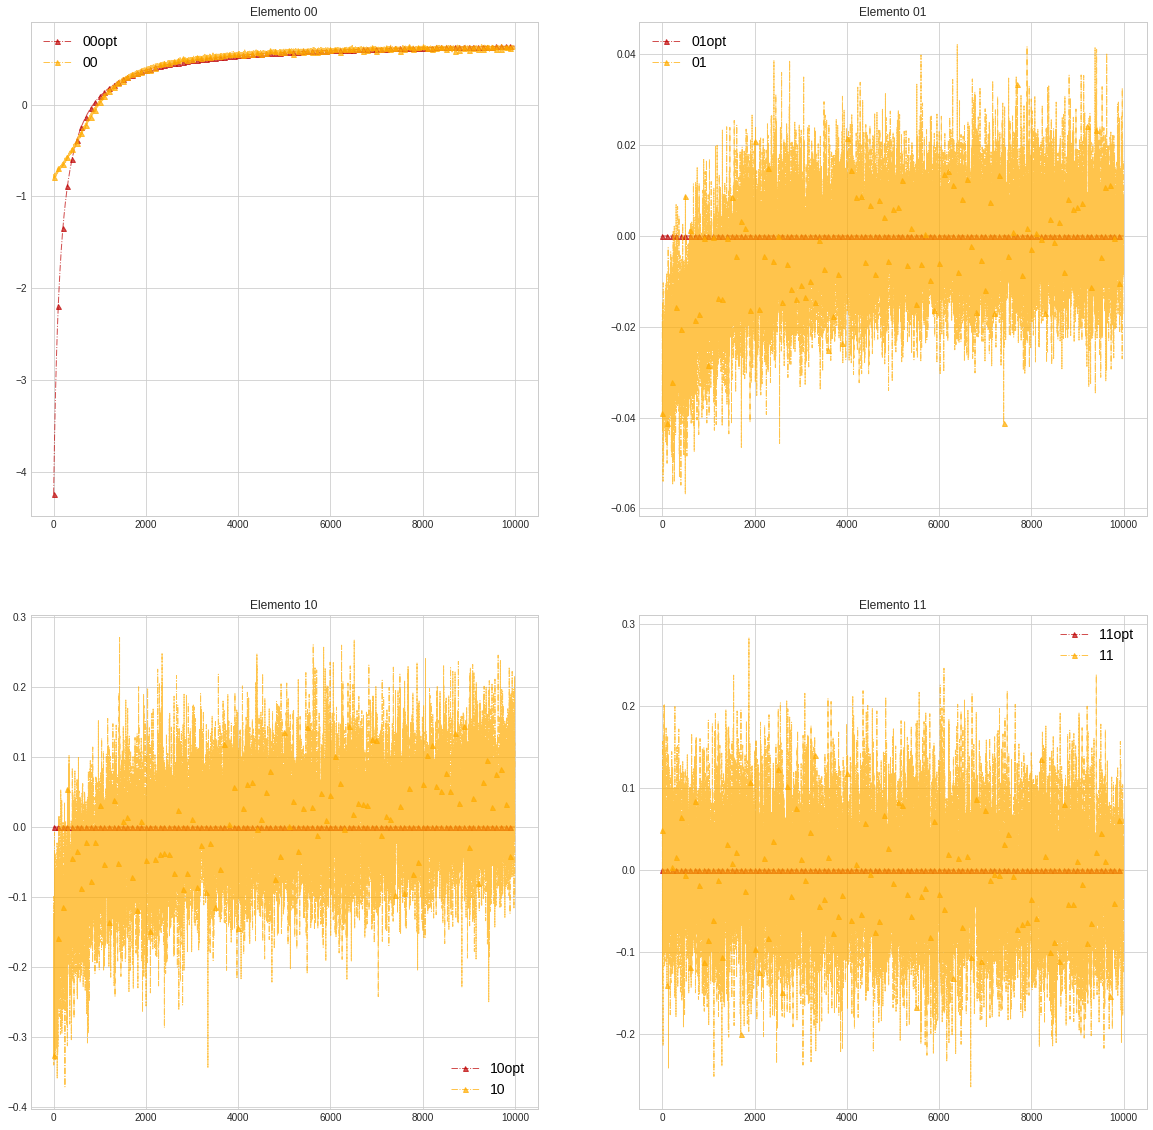

<Figure size 1440x1440 with 0 Axes>

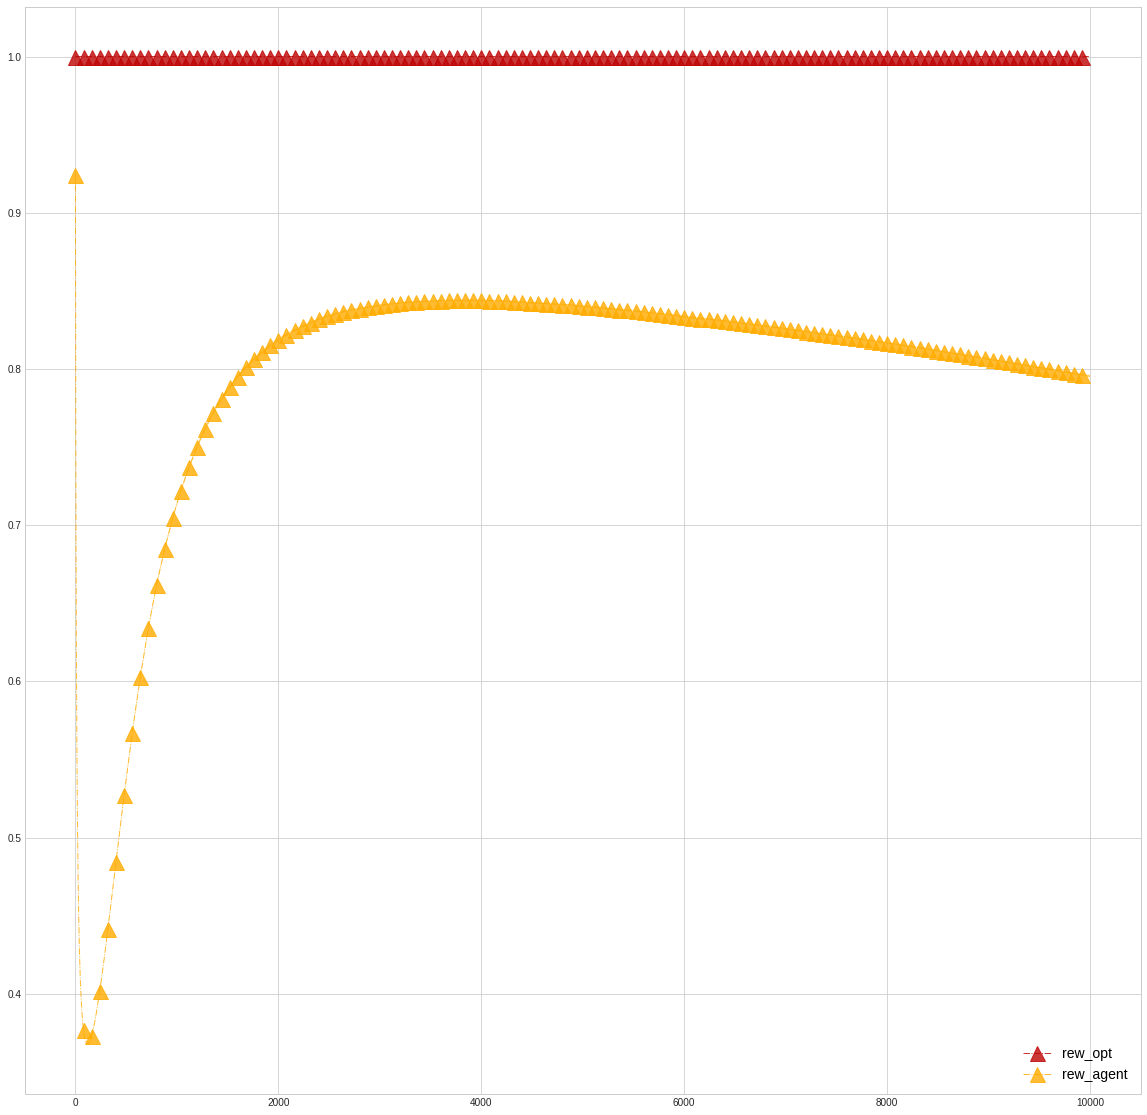

<Figure size 1440x1440 with 0 Axes>

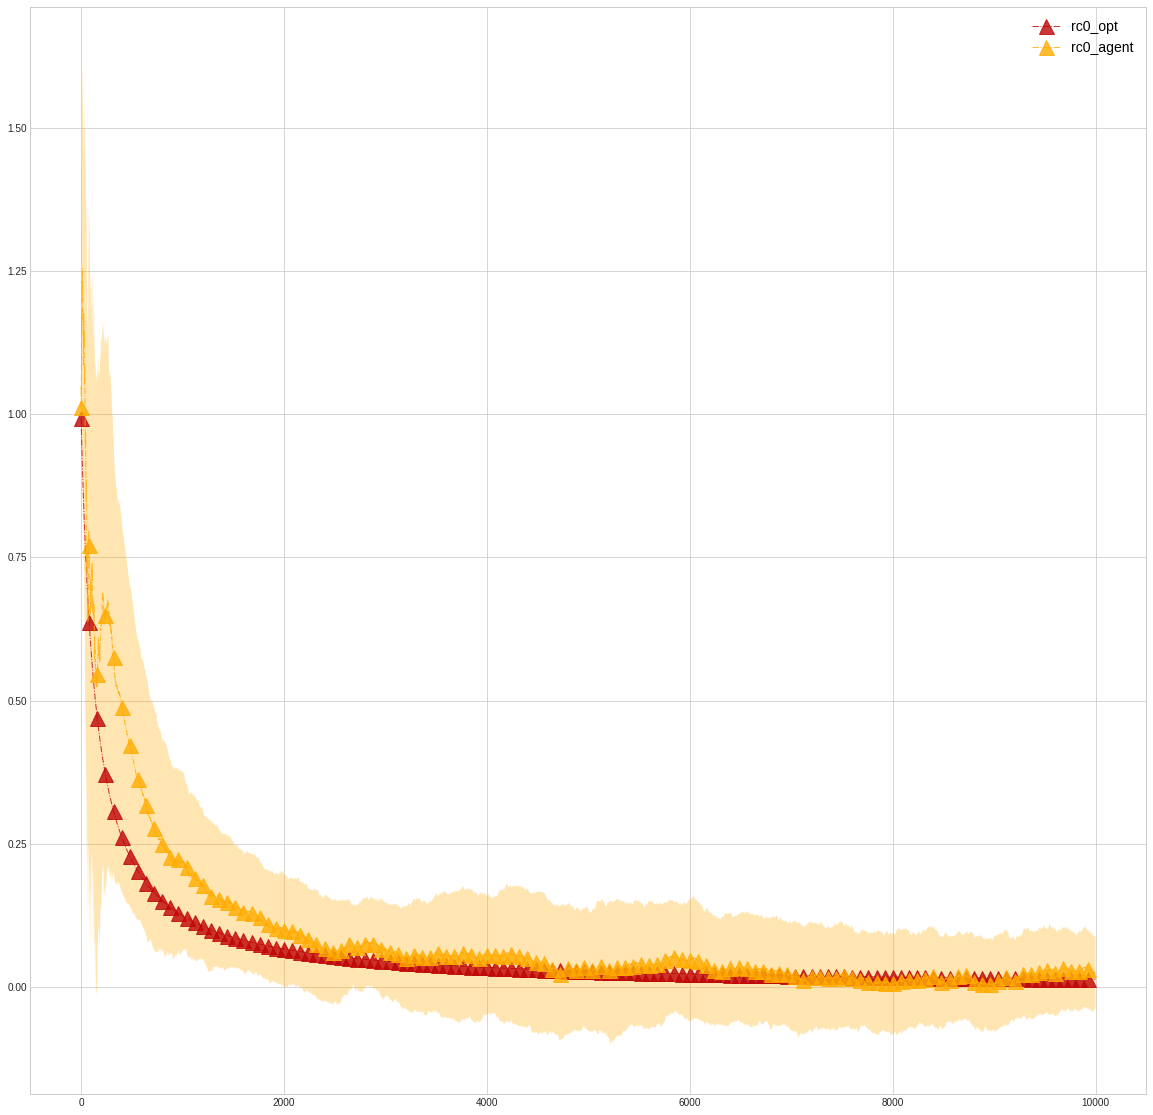

<Figure size 1440x1440 with 0 Axes>

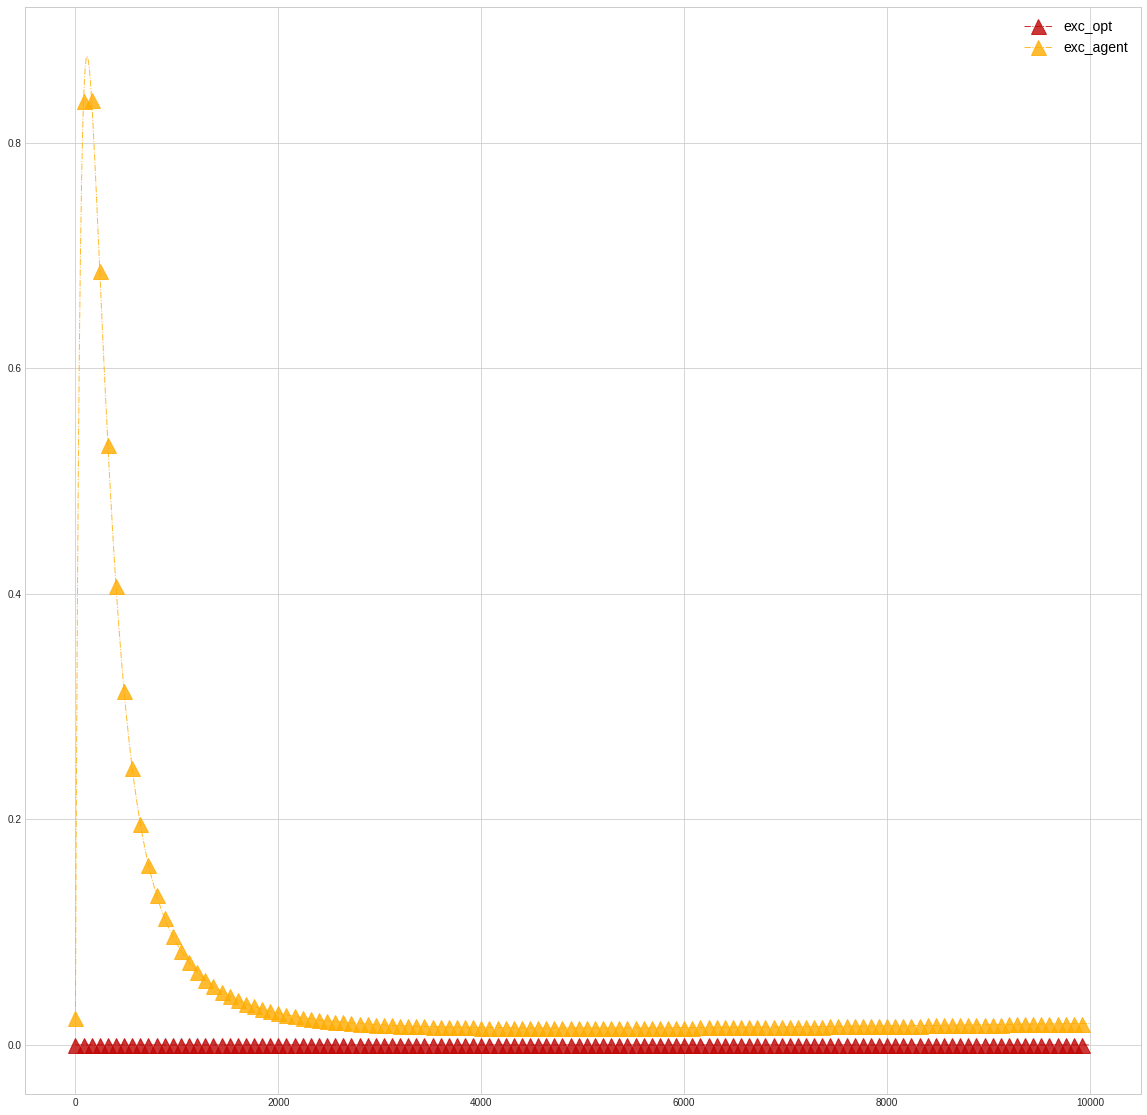

<Figure size 1440x1440 with 0 Axes>

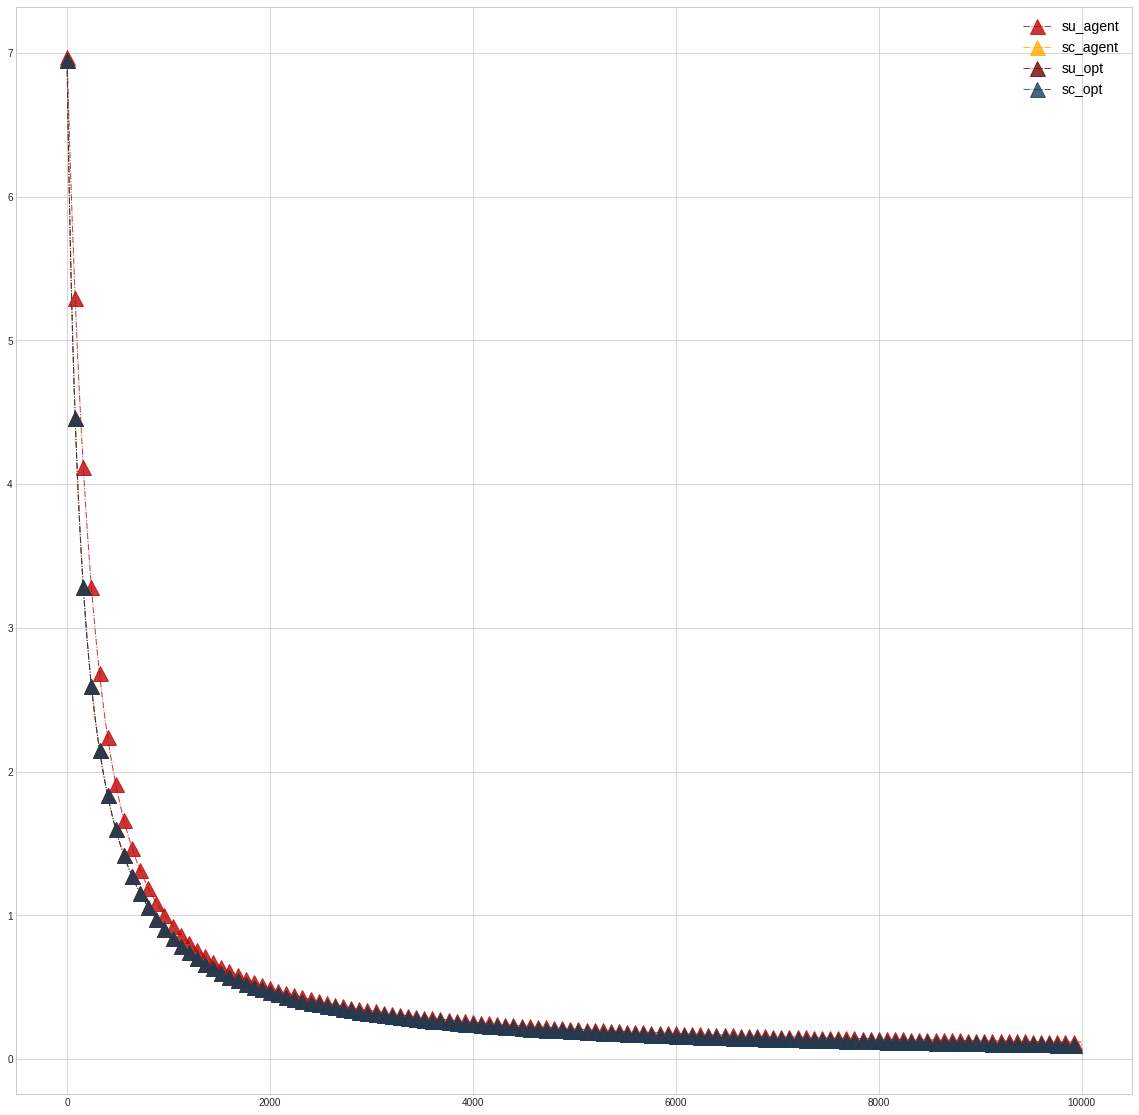

<Figure size 1440x1440 with 0 Axes>

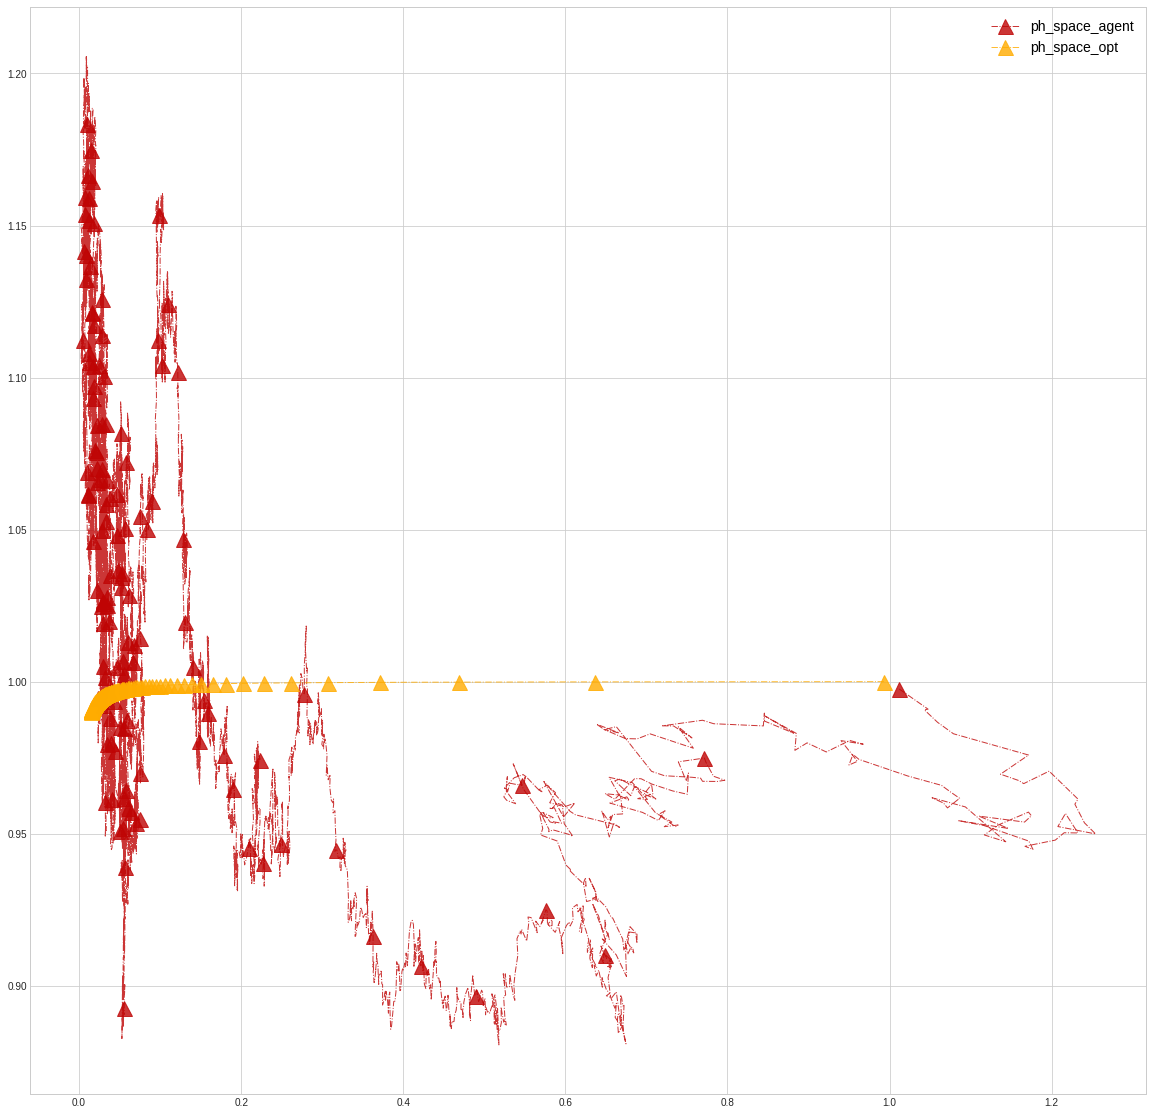

<Figure size 1440x1440 with 0 Axes>

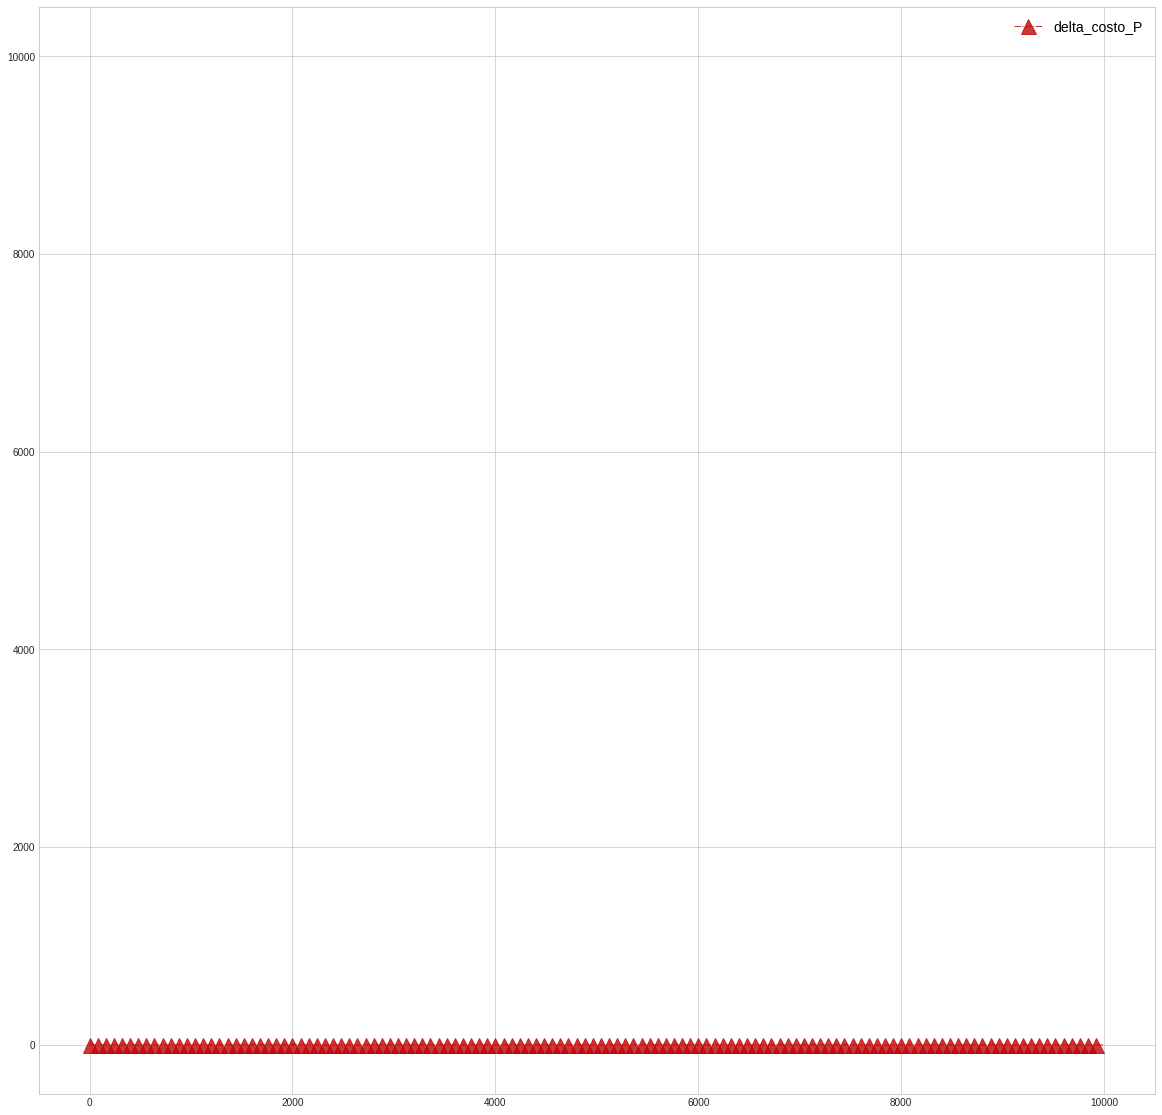

In [4]:

x=np.array(list(range(0,steps)))

a=0.7
dim=len(DATA['rmean'][0,:])


plt.figure('M(t)')
fig, ax = plt.subplots(dim,dim)
for i in range(0,dim):
    for j in range(0,dim):
        ax[i, j].set_title('Elemento {}{}'.format(i,j))
        ax[i,j].plot(x,DATA['azionemean2'][:,i,j],'-.',linewidth=1,marker='^',markersize=5,markevery=100,label='{}{}opt'.format(i,j),alpha=a)
        ax[i,j].plot(x,DATA['azionemean'][:,i,j],'-.',linewidth=1,marker='^',markersize=5,markevery=100,label='{}{}'.format(i,j),alpha=a)
        #ax[0,0].fill_betweenx(x, DATA['azionemean'][:,i,j]-0.5*DATA['azionestd'][:,i,j] DATA['azionemean'][:,i,j]+0.5*DATA['azionestd'][:,i,j],alpha=0.3)
        leg = ax[i,j].legend(prop={'size': 14})
        text=leg.get_texts()
        for k in range(0,len(text)):
            text[k].set_color('black')


a=0.8
plt.figure('reward')
fig, ax = plt.subplots()
ax.plot(x,DATA['rewmean2'],'-.',linewidth=1,marker='^',markersize=15,markevery=80,label='rew_opt',alpha=a)
ax.fill_between(x, DATA['rewmean2']-0.5*DATA['rewstd2'], DATA['rewmean2']+0.5*DATA['rewstd2'],alpha=0.3)
ax.plot(x,DATA['rewmean'],'-.',linewidth=1,marker='^',markersize=15,markevery=80,label='rew_agent',alpha=a)
ax.fill_between(x,  DATA['rewmean']-0.5*DATA['rewstd'], DATA['rewmean']+0.5*DATA['rewstd'],alpha=0.3)
leg = ax.legend(prop={'size': 14})
text=leg.get_texts()
for i in range(0,len(text)):
    text[i].set_color('black')


plt.figure('r')
fig, ax = plt.subplots()
ax.plot(x,DATA['rmean2'][:,0],'-.',linewidth=1,marker='^',markersize=15,markevery=80,label='rc0_opt',alpha=a)
ax.fill_between(x, DATA['rmean2'][:,0]-0.5*DATA['rstd2'][:,0], DATA['rmean2'][:,0]+0.5*DATA['rstd2'][:,0] ,alpha=0.3)
ax.plot(x,DATA['rmean'][:,0],'-.',linewidth=1,marker='^',markersize=15,markevery=80,label='rc0_agent',alpha=a)
ax.fill_between(x, DATA['rmean'][:,0]-DATA['rstd'][:,0], DATA['rmean'][:,0]+DATA['rstd'][:,0] ,alpha=0.3)
leg = ax.legend(prop={'size': 14})
text=leg.get_texts()
for i in range(0,len(text)):
    text[i].set_color('black')

plt.figure('excess')
fig, ax = plt.subplots()
ax.plot(x,DATA['excmean2'][:,0,0],'-.',linewidth=1,marker='^',markersize=15,markevery=80,label='exc_opt',alpha=a)
ax.plot(x,DATA['excmean'][:,0,0],'-.',linewidth=1,marker='^',markersize=15,markevery=80,label='exc_agent',alpha=a)

leg = ax.legend(prop={'size': 14})
text=leg.get_texts()
for i in range(0,len(text)):
    text[i].set_color('black')

plt.figure('sigma00mean')
fig, ax = plt.subplots()
ax.plot(x,DATA['sumean'][:,0,0],'-.',linewidth=1,marker='^',markersize=15,markevery=80,label='su_agent',alpha=a)
ax.plot(x,DATA['scmean'][:,0,0],'-.',linewidth=1,marker='^',markersize=15,markevery=80,label='sc_agent',alpha=a)
ax.plot(x,DATA['sumean2'][:,0,0],'-.',linewidth=1,marker='^',markersize=15,markevery=80,label='su_opt',alpha=a)
ax.plot(x,DATA['scmean2'][:,0,0],'-.',linewidth=1,marker='^',markersize=15,markevery=80,label='sc_opt',alpha=a)
leg = ax.legend(prop={'size': 14})
text=leg.get_texts()
for i in range(0,len(text)):
    text[i].set_color('black')



plt.figure('phasesp')
fig, ax = plt.subplots()
ax.plot(DATA['rmean'][:,0],DATA['rmean'][:,1],'-.',linewidth=1,marker='^',markersize=15,markevery=80,label='ph_space_agent',alpha=a)
#ax.errorbar(rmean[:,0], rmean[:,1], yerr=rstd[:,1],xerr=rstd[:,0],alpha=0.2,lw=0.1)
#ax.fill_between(rmean[:,0], rmean[:,1]-rstd[:,1], rmean[:,1]+rstd[:,1] ,alpha=0.3)
#ax.fill_betweenx(rmean[:,1], rmean[:,0]-rstd[:,0], rmean[:,0]+rstd[:,0] ,alpha=0.3)
ax.plot(DATA['rmean2'][:,0],DATA['rmean2'][:,1],'-.',linewidth=1,marker='^',markersize=15,markevery=80,label='ph_space_opt',alpha=a)
#ax.errorbar(rmean2[:,0], rmean2[:,1], yerr=rstd2[:,1],xerr=rstd2[:,0],alpha=0.2,lw=0.1)
#ax.fill_between(rmean2[:,0], rmean2[:,1]-rstd2[:,1], rmean2[:,1]+rstd2[:,1] ,alpha=0.3)
#ax.fill_betweenx(rmean2[:,1], rmean2[:,0]-rstd2[:,0], rmean2[:,0]+rstd2[:,0] ,alpha=0.3)
leg = ax.legend(prop={'size': 14})
text=leg.get_texts()
for i in range(0,len(text)):
    text[i].set_color('black')


plt.figure('dcostoP (agente-optimal)')
fig, ax = plt.subplots()
ax.plot(x,DATA['Qcostmean'],'-.',linewidth=1,marker='^',markersize=15,markevery=80,label='delta_costo_P',alpha=a)
ax.fill_betweenx(x, DATA['Qcostmean']-0.5*DATA['Qcoststd'] , DATA['Qcostmean']+0.5*DATA['Qcoststd'] ,alpha=0.3)
leg = ax.legend(prop={'size': 14})
text=leg.get_texts()
for i in range(0,len(text)):
    text[i].set_color('black')




In [ ]:
plt.rcParams['figure.figsize'] = [20,15]
plt.figure('excess')
fig, ax = plt.subplots()
ax.plot(x,eccesso1[:,0,0],'-.b',label='exc_agent')
ax.plot(x,eccesso2[:,0,0],'-.m',label='exc_opt')
leg = ax.legend()


In [ ]:
plt.rcParams['figure.figsize'] = [20,15]
plt.figure('excess')
fig, ax = plt.subplots()
ax.plot(x[1000:3000],eccesso1[1000:3000,0,0],'-.b',label='exc_agent')
ax.plot(x[1000:3000],eccesso2[1000:3000,0,0],'-.m',label='exc_opt')
leg = ax.legend()


In [ ]:
plt.figure('K(t) agente')
fig, ax = plt.subplots()
ax.plot(x,azionemean[:,0,0],'-.b',label='00')
#ax.fill_betweenx(x, azionemean[:,0,0]-azionestd[:,0,0] ,azionemean[:,0,0]+azionestd[:,0,0] ,alpha=0.3)
ax.plot(x,azioneoptmean[:,0,0],'-.',label='00opt')
#ax.plot(x,azioneoptmean[:,1,1],'-.',label='11opt')
#ax.plot(x,azioneoptmean[:,1,0],'-.',label='10opt')
#ax.plot(x,azioneoptmean[:,0,1],'-.',label='01opt')
ax.plot(x,azionemean[:,0,1],'-.m',label='01')
#ax.fill_betweenx(x, azionemean[:,0,1]-azionestd[:,0,1] ,azionemean[:,0,1]+azionestd[:,0,1] ,alpha=0.3)
ax.plot(x,azionemean[:,1,0],'-.y',label='10')
#ax.fill_betweenx(x, azionemean[:,0,0]-azionestd[:,1,0] ,azionemean[:,1,0]+azionestd[:,1,0] ,alpha=0.3)
ax.plot(x,azionemean[:,1,1],'-.c',label='11')
#ax.fill_betweenx(x, azionemean[:,1,1]-azionestd[:,1,1] ,azionemean[:,1,1]+azionestd[:,1,1] ,alpha=0.3)
leg = ax.legend()

In [ ]:
plt.rcParams['figure.figsize'] = [15,10]
plt.figure('phasesp')
fig, ax = plt.subplots()
ax.plot(rmean[:,0],rmean[:,1],'-.b',label='ph_space_agent')
#ax.errorbar(rmean[:,0], rmean[:,1], yerr=rstd[:,1],xerr=rstd[:,0],alpha=0.2,lw=0.1)
#ax.fill_between(rmean[:,0], rmean[:,1]-rstd[:,1], rmean[:,1]+rstd[:,1] ,alpha=0.3)
#ax.fill_betweenx(rmean[:,1], rmean[:,0]-rstd[:,0], rmean[:,0]+rstd[:,0] ,alpha=0.3)
ax.plot(rmean2[:,0],rmean2[:,1],'-.m',label='ph_space_opt')
#ax.errorbar(rmean2[:,0], rmean2[:,1], yerr=rstd2[:,1],xerr=rstd2[:,0],alpha=0.2,lw=0.1)
#ax.fill_between(rmean2[:,0], rmean2[:,1]-rstd2[:,1], rmean2[:,1]+rstd2[:,1] ,alpha=0.3)
#ax.fill_betweenx(rmean2[:,1], rmean2[:,0]-rstd2[:,0], rmean2[:,0]+rstd2[:,0] ,alpha=0.3)
leg = ax.legend()


In [ ]:
plt.figure('reward')

fig, ax = plt.subplots()
ax.plot(x,rewmean-rewmean2,'-.b',label='rew_agent-opt')
x=np.array(x)
ax.plot(x,x-x)
#ax.fill_between(x,  rewmean-rewstd, rewmean+rewstd ,alpha=0.3)
#ax.plot(x,rewmean2,'-.m',label='rew_opt')
#ax.fill_between(x,  rewmean2-rewstd2, rewmean2+rewstd2 ,alpha=0.3)
leg = ax.legend()
plt.ylim([-1e-2,1e-2])


<Figure size 1440x1440 with 0 Axes>

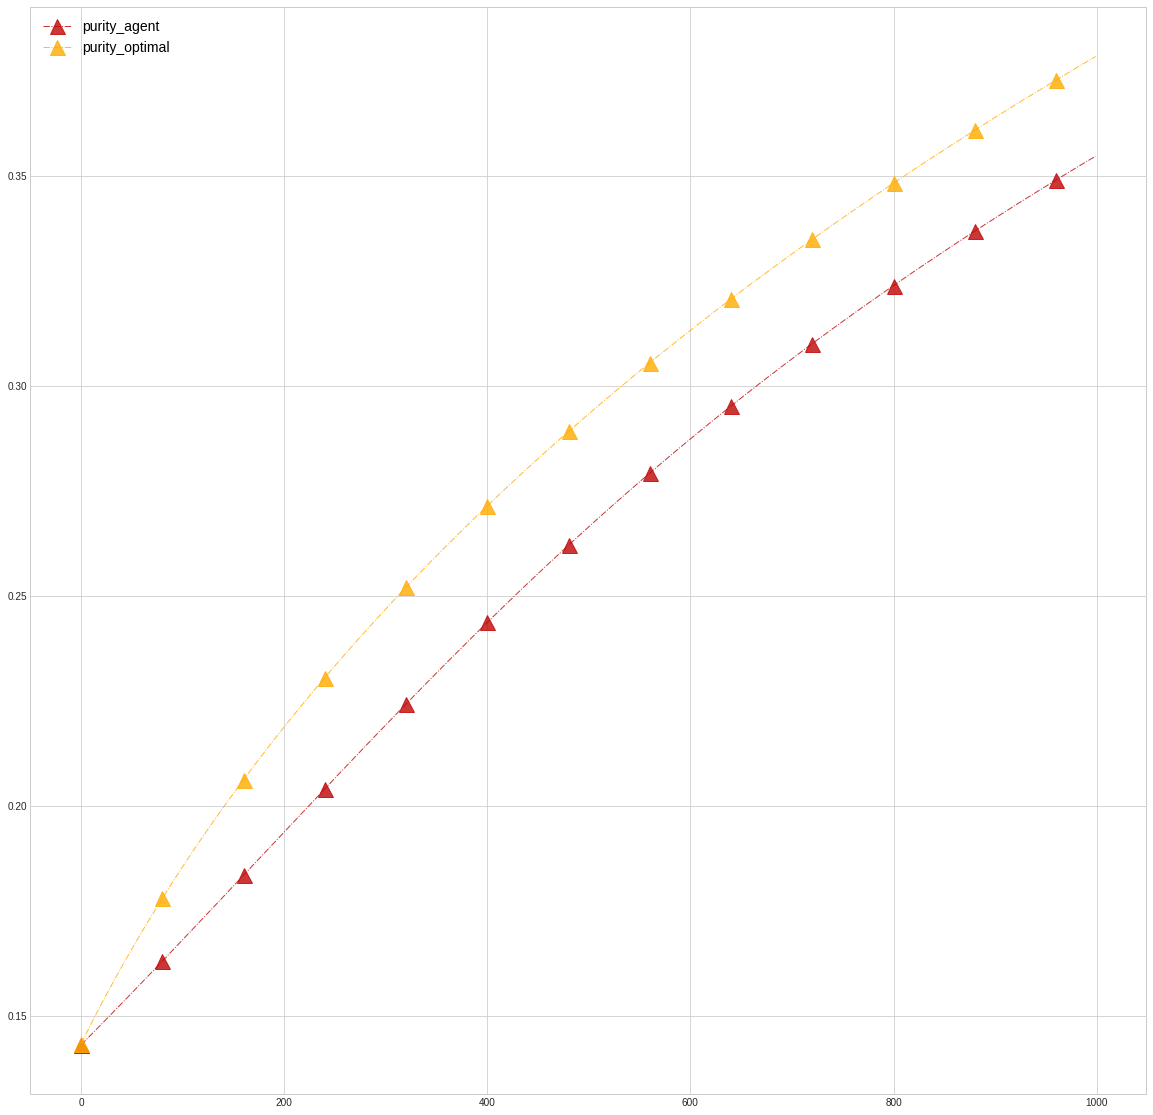

In [8]:

purity1=[]
purity2=[]
for i in range(0,steps):
    c=np.linalg.det(DATA['sumean'][i,:,:])
    b=np.linalg.det(DATA['sumean2'][i,:,:])
    purity1.append(c**(-0.5))
    purity2.append(b**(-0.5))

    
plt.figure('purity')
fig, ax = plt.subplots()
ax.plot(x,purity1,'-.',linewidth=1,marker='^',markersize=15,markevery=80,label='purity_agent',alpha=a)
ax.plot(x,purity2,'-.',linewidth=1,marker='^',markersize=15,markevery=80,label='purity_optimal',alpha=a)
leg = ax.legend(prop={'size': 14})
text=leg.get_texts()
for i in range(0,len(text)):
    text[i].set_color('black')
